
# Import R

**Start rmagic by executing this in a cell:**

In [ ]:
%load_ext rpy2.ipython

**Import the built-in datasets in R**

In [ ]:
%%R
library(datasets)

**Install and load packages**

In [ ]:
%%R
library(dplyr)
if (!requireNamespace("ggplot2", quietly = TRUE)) {
  install.packages("ggplot2")
}
library(ggplot2)

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




## Play around with the ChickWeight dataset
**Show the first records of ChickWeight**

In [ ]:
a=1

def do(x):
    return(x+a)

print(do(1))

2


In [ ]:
%%R
data(ChickWeight)
head(ChickWeight, 5)

  weight Time Chick Diet
1     42    0     1    1
2     51    2     1    1
3     59    4     1    1
4     64    6     1    1
5     76    8     1    1


**Get information about ChickWeight**


In [ ]:
%%R
?ChickWeight

File: /tmp/RtmphECuNk/Rtxt91294b5d01
ChickWeight              package:datasets              R Documentation



_W_e_i_g_h_t _v_e_r_s_u_s _a_g_e _o_f _c_h_i_c_k_s _o_n _d_i_f_f_e_r_e_n_t _d_i_e_t_s



_D_e_s_c_r_i_p_t_i_o_n:



     The ‘ChickWeight’ data frame has 578 rows and 4 columns from an

     experiment on the effect of diet on early growth of chicks.



_U_s_a_g_e:



     ChickWeight

     

_F_o_r_m_a_t:



     An object of class ‘c("nfnGroupedData", "nfGroupedData",

     "groupedData", "data.frame")’ containing the following columns:



     weight a numeric vector giving the body weight of the chick (gm).



     Time a numeric vector giving the number of days since birth when

          the measurement was made.



     Chick an ordered factor with levels ‘18’ < ... < ‘48’ giving a

          unique identifier for the chick.  The ordering of the levels

          groups chicks on the same diet together and ord

**Summary of each attribute**


In [ ]:
%%R
summary(ChickWeight)

     weight           Time           Chick     Diet   
 Min.   : 35.0   Min.   : 0.00   13     : 12   1:220  
 1st Qu.: 63.0   1st Qu.: 4.00   9      : 12   2:120  
 Median :103.0   Median :10.00   20     : 12   3:120  
 Mean   :121.8   Mean   :10.72   10     : 12   4:118  
 3rd Qu.:163.8   3rd Qu.:16.00   17     : 12          
 Max.   :373.0   Max.   :21.00   19     : 12          
                                 (Other):506          


**Check and ensure ChickWeight in the right format**

In [ ]:
%%R
str(ChickWeight)

Classes ‘nfnGroupedData’, ‘nfGroupedData’, ‘groupedData’ and 'data.frame':	578 obs. of  4 variables:
 $ weight: num  42 51 59 64 76 93 106 125 149 171 ...
 $ Time  : num  0 2 4 6 8 10 12 14 16 18 ...
 $ Chick : Ord.factor w/ 50 levels "18"<"16"<"15"<..: 15 15 15 15 15 15 15 15 15 15 ...
 $ Diet  : Factor w/ 4 levels "1","2","3","4": 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "formula")=Class 'formula'  language weight ~ Time | Chick
  .. ..- attr(*, ".Environment")=<environment: R_EmptyEnv> 
 - attr(*, "outer")=Class 'formula'  language ~Diet
  .. ..- attr(*, ".Environment")=<environment: R_EmptyEnv> 
 - attr(*, "labels")=List of 2
  ..$ x: chr "Time"
  ..$ y: chr "Body weight"
 - attr(*, "units")=List of 2
  ..$ x: chr "(days)"
  ..$ y: chr "(gm)"


# Visualization

**Số Lượng gà phân theo loại Diet**

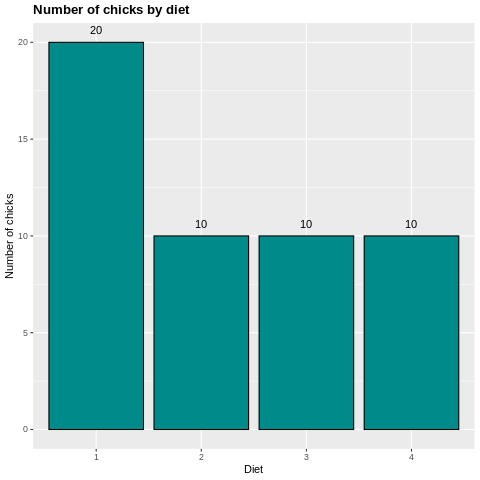

In [ ]:
%%R
# Tính số lượng chick duy nhất phân theo diet
chick_count <- ChickWeight %>%
  group_by(Diet) %>%
  summarise(Count = n_distinct(Chick))

# Vẽ biểu đồ cột số lượng chick theo diet
ggplot(data = chick_count, aes(x = Diet, y = Count)) +
  geom_bar(stat = "identity", fill = "darkcyan", color = "black")+
  geom_text(aes(label = Count), vjust=-1) +
  labs(y = "Number of chicks", title = "Number of chicks by diet")  + theme(plot.title = element_text(face = "bold"))


**Cân nặng trung bình của gà phân theo diet**

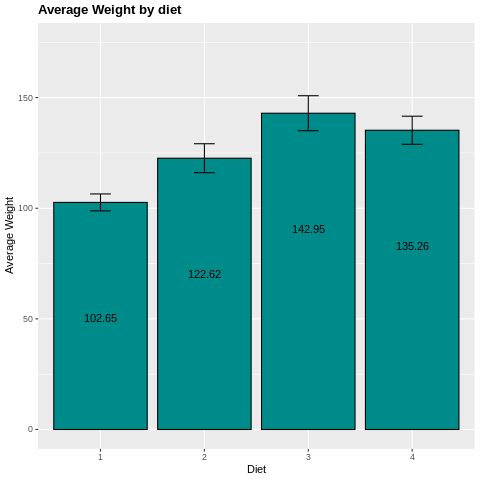

In [ ]:
%%R
#tính cân nặng trung bình phân theo diet
average_weight <- ChickWeight %>%
  group_by(Diet) %>%
  summarise(AverageWeightByDiet = mean(weight),
            SEM = sd(weight) / sqrt(n())) #tính độ lệch chuẩn


#vẽ biểu đồ cột
ggplot(data = average_weight, aes(x = Diet, y = AverageWeightByDiet)) +
  ylim(0, 175) +
  geom_bar(stat = "identity", fill = "darkcyan", color = "black") + #add bars
  geom_errorbar(aes(ymin = AverageWeightByDiet - SEM, ymax = AverageWeightByDiet + SEM), width = .2) + #add error bars
  geom_text(aes(label = round(AverageWeightByDiet, digits = 2)), vjust = 15) +
  labs(y = "Average Weight", title = "Average Weight by diet") +
  theme(plot.title = element_text(face = "bold")) #bold title:)

**Cân nặng trung bình phân theo ngày đo**

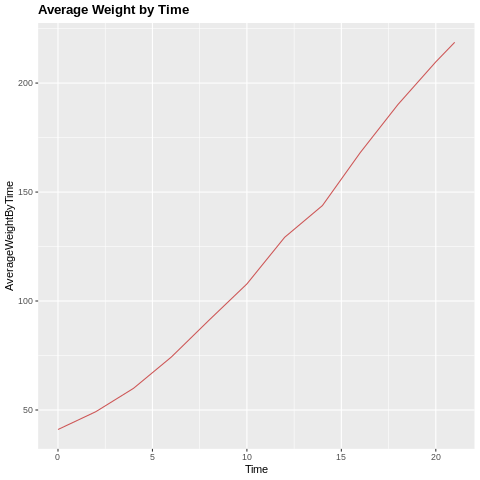

In [ ]:
%%R
average_by_time <- ChickWeight %>%
  group_by(Time) %>%
  summarise(AverageWeightByTime = mean(weight))
# Vẽ biểu đồ
ggplot(average_by_time, aes(x=Time, y=AverageWeightByTime))+
  geom_line(color='indianred3')+
  labs(title='Average Weight by Time') + theme(plot.title = element_text(face = "bold"))

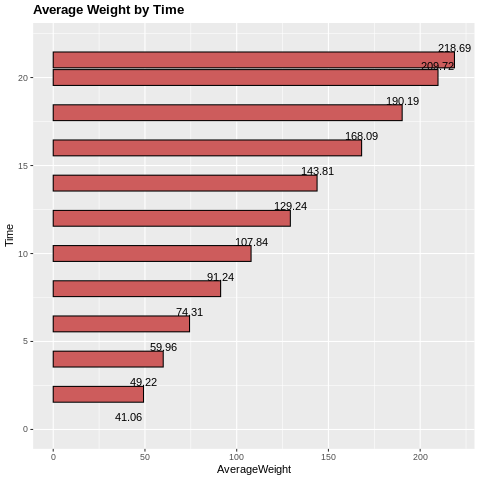

In [ ]:
%%R
# Trực quan cân nặng trung bình theo ngày đo
average_by_time <- ChickWeight %>%
  group_by(Time) %>%
  summarise(AverageWeightByTime = mean(weight))

# Vẽ biểu đồ
ggplot(data = average_by_time, aes(x = Time, y = AverageWeightByTime)) + xlim(0, 22)+
  geom_bar(stat = "identity", fill = "indianred", color = "black") +
  geom_text (aes(label = round(AverageWeightByTime,digits = 2)), vjust=-1)+
  labs(y = "AverageWeight", title = "Average Weight by Time") +
  theme(plot.title = element_text(face = "bold")) +
  coord_flip() #lật dọc

#Sử dụng regression để tính độ tăng trưởng của gà theo mỗi loại diet

In [ ]:
%%R
# Load dataset
data(ChickWeight)
chick_data <- ChickWeight

# chuyển diet thành 1 categorical
chick_data$Diet <- as.factor(chick_data$Diet)

# Model Building: dùng linear regression để đoán cân nặng của con dựa trên time và diet
model <- lm(weight ~ Time + Diet, data = chick_data)

# evaluation
summary(model)


Call:
lm(formula = weight ~ Time + Diet, data = chick_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-136.851  -17.151   -2.595   15.033  141.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.9244     3.3607   3.251  0.00122 ** 
Time          8.7505     0.2218  39.451  < 2e-16 ***
Diet2        16.1661     4.0858   3.957 8.56e-05 ***
Diet3        36.4994     4.0858   8.933  < 2e-16 ***
Diet4        30.2335     4.1075   7.361 6.39e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 35.99 on 573 degrees of freedom
Multiple R-squared:  0.7453,	Adjusted R-squared:  0.7435 
F-statistic: 419.2 on 4 and 573 DF,  p-value: < 2.2e-16



In [ ]:
%%R
# reorder columns
dataset <- ChickWeight
dataset <- dataset[,c(3,4,2,1)]

# đổi tên
names(dataset) <- c("chick", "diet", "time", "weight")

# Attach dataset
attach(dataset)

#xem
head(dataset)

  chick diet time weight
1     1    1    0     42
2     1    1    2     51
3     1    1    4     59
4     1    1    6     64
5     1    1    8     76
6     1    1   10     93


In [ ]:
%%R
summary(dataset)

     chick     diet         time           weight     
 13     : 12   1:220   Min.   : 0.00   Min.   : 35.0  
 9      : 12   2:120   1st Qu.: 4.00   1st Qu.: 63.0  
 20     : 12   3:120   Median :10.00   Median :103.0  
 10     : 12   4:118   Mean   :10.72   Mean   :121.8  
 17     : 12           3rd Qu.:16.00   3rd Qu.:163.8  
 19     : 12           Max.   :21.00   Max.   :373.0  
 (Other):506                                          


**Visualize regression cho mỗi diet**

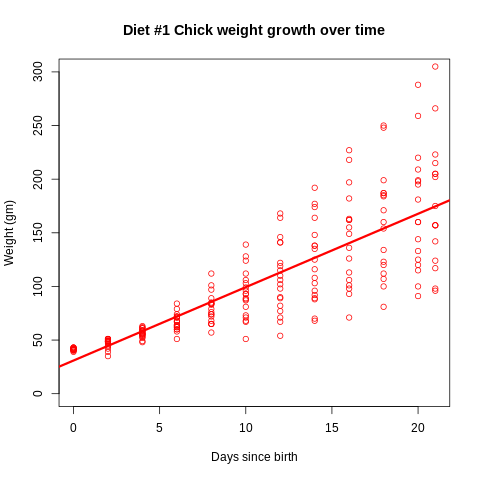

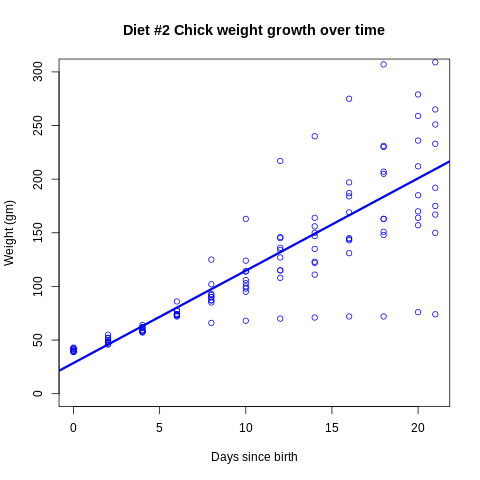

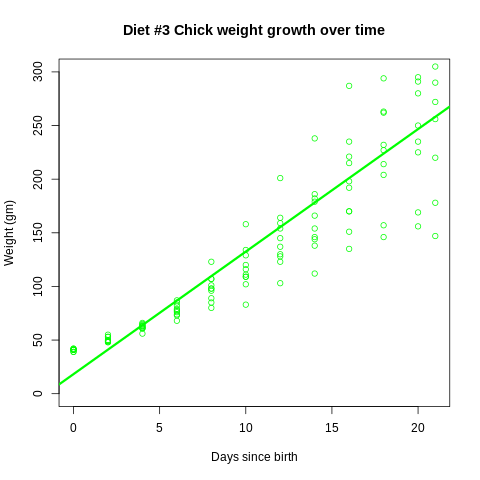

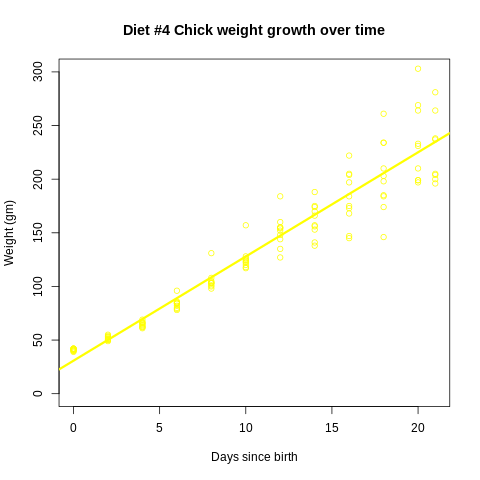

In [ ]:
%%R
# regression cho mỗi diet
diet.1.model <- lm(weight ~ time, data=dataset[diet==1,])
diet.2.model <- lm(weight ~ time, data=dataset[diet==2,])
diet.3.model <- lm(weight ~ time, data=dataset[diet==3,])
diet.4.model <- lm(weight ~ time, data=dataset[diet==4,])

# Diet #1 Scatter Plot
plot(time[diet==1], weight[diet==1], col="red", xlim=c(0,21),
     ylim=c(0,300), xlab="Days since birth", ylab="Weight (gm)",
     main="Diet #1 Chick weight growth over time")
abline(diet.1.model, col="red", lwd=3)

# Diet #2 Scatter Plot
plot(time[diet==2], weight[diet==2], col="blue", xlim=c(0,21),
     ylim=c(0,300), xlab="Days since birth", ylab="Weight (gm)",
     main="Diet #2 Chick weight growth over time")
abline(diet.2.model, col="blue", lwd=3)

# Diet #3 Scatter Plot
plot(time[diet==3], weight[diet==3], col="green", xlim=c(0,21),
     ylim=c(0,300), xlab="Days since birth", ylab="Weight (gm)",
     main="Diet #3 Chick weight growth over time")
abline(diet.3.model, col="green", lwd=3)

# Diet #4 Scatter Plot
plot(time[diet==4], weight[diet==4], col="yellow", xlim=c(0,21),
     ylim=c(0,300), xlab="Days since birth", ylab="Weight (gm)",
     main="Diet #4 Chick weight growth over time")
abline(diet.4.model, col="yellow", lwd=3)


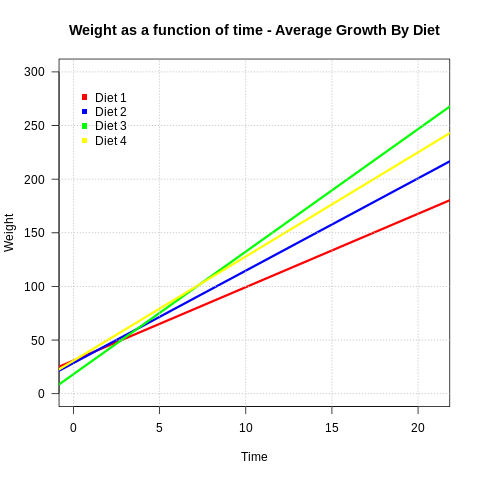

In [ ]:
%%R
# Cân năng theo thời gian - Tăng trưởng trung bình theo chế độ ăn
plot(c(), c(), xlim=c(0,21), ylim=c(0,300), xlab="Time", ylab="Weight",
     main="Weight as a function of time - Average Growth By Diet", las=1)

abline(diet.1.model, col="red", lwd=3)
abline(diet.2.model, col="blue", lwd=3)
abline(diet.3.model, col="green", lwd=3)
abline(diet.4.model, col="yellow", lwd=3)

grid(col="grey");

legend(x=0, y=290, bt="n", legend=c("Diet 1", "Diet 2", "Diet 3", "Diet 4"),
       col=c("red", "blue", "green", "yellow"), pch=15)

**Tốc độ tăng trưởng cân nặng của tưng nhóm diet**

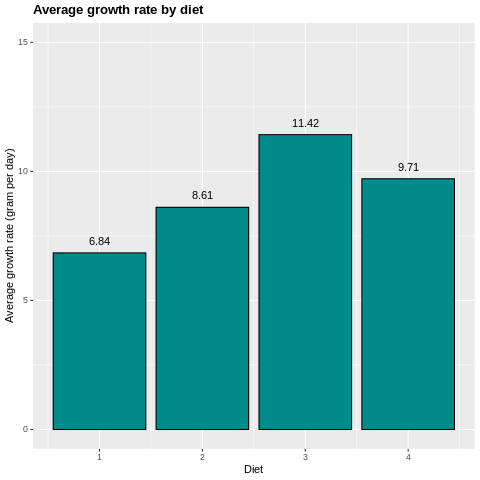

In [ ]:
%%R
#gán giá trị vào biến
diet.1.growth <- as.numeric(diet.1.model$coefficients[2])
diet.2.growth <- as.numeric(diet.2.model$coefficients[2])
diet.3.growth <- as.numeric(diet.3.model$coefficients[2])
diet.4.growth <- as.numeric(diet.4.model$coefficients[2])


growth_rate <- data.frame(
    Diet = c(1,2,3,4),
    growth_rate = c(diet.1.growth, diet.2.growth, diet.3.growth, diet.4.growth)
)

# Vẽ biểu đồ cột thể hiện tốc độ tăng trưởng
ggplot(data = growth_rate, aes(x = Diet, y = growth_rate)) + ylim(0, 15)+
  geom_col(fill = "darkcyan", color = "black") +
  geom_text(aes(label = round(growth_rate, digits = 2)), vjust = -1) +
  labs(y = "Average growth rate (gram per day)", title = "Average growth rate by diet") +
  theme(plot.title = element_text(face = "bold"))


In [ ]:
%%R
print(paste0("Diet #1 growth rate is: ", diet.1.growth, " gm per day."))
print(paste0("Diet #2 growth rate is: ", diet.2.growth, " gm per day."))
print(paste0("Diet #3 growth rate is: ", diet.3.growth, " gm per day."))
print(paste0("Diet #4 growth rate is: ", diet.4.growth, " gm per day."))


[1] "Diet #1 growth rate is: 6.84179719838213 gm per day."
[1] "Diet #2 growth rate is: 8.60913628800484 gm per day."
[1] "Diet #3 growth rate is: 11.4228709726214 gm per day."
[1] "Diet #4 growth rate is: 9.71436556201541 gm per day."


# Clean up

In [ ]:
%%R
detach("package:datasets", unload=TRUE) #for base